In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv("Camp_Market_cleaned_Income.csv")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Income_Imputed
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/12,58,635,...,0,0,0,0,0,0,3,11,1,False
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/14,38,11,...,0,0,0,0,0,0,3,11,0,False
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/13,26,426,...,0,0,0,0,0,0,3,11,0,False
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/14,26,11,...,0,0,0,0,0,0,3,11,0,False
4,5324,1981,PhD,Married,58293.0,1,0,1/19/14,94,173,...,0,0,0,0,0,0,3,11,0,False


In [4]:
df["Frequency"] = (
    df["NumDealsPurchases"]
    + df["NumWebPurchases"]
    + df["NumCatalogPurchases"]
    + df["NumStorePurchases"]
)

df["Monetary"] = (
    df["MntWines"]
    + df["MntFruits"]
    + df["MntMeatProducts"]
    + df["MntFishProducts"]
    + df["MntSweetProducts"]
    + df["MntGoldProds"]
)

df.rename(columns={"Recency": "RecencyDays"}, inplace=True)

df["Age"] = 2025 - df["Year_Birth"]
df["TotalKids"] = df["Kidhome"] + df["Teenhome"]
df["Campaign_Accept_Rate"] = (
    df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].sum(axis=1) / 5
)


In [ ]:
features = df[[
    "RecencyDays",
    "Frequency",
    "Monetary",
    "Income",
    "Age",
    "TotalKids",
    "NumWebVisitsMonth",
    "Campaign_Accept_Rate"
]]

features = features.dropna()

df = df.loc[features.index]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

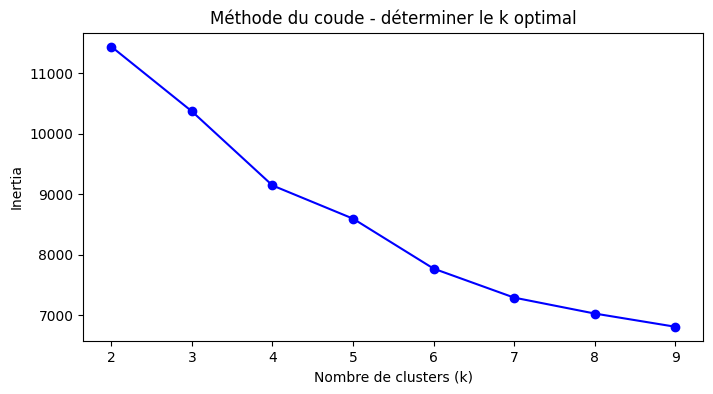

In [ ]:
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'o-', color='b')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia')
plt.title('Méthode du coude - déterminer le k optimal')
plt.show()

In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"k={k} → Silhouette Score: {score:.3f}")

k=2 → Silhouette Score: 0.287
k=3 → Silhouette Score: 0.177
k=4 → Silhouette Score: 0.189
k=5 → Silhouette Score: 0.190
k=6 → Silhouette Score: 0.190
k=7 → Silhouette Score: 0.189
k=8 → Silhouette Score: 0.174
k=9 → Silhouette Score: 0.171


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
cluster_profile = df.groupby("Cluster")[[
    "RecencyDays", "Frequency", "Monetary", "Income", "Age", "TotalKids", "NumWebVisitsMonth", "Campaign_Accept_Rate"
]].mean().round(2)

cluster_profile

,RecencyDays,Frequency,Monetary,Income,Age,TotalKids,NumWebVisitsMonth,Campaign_Accept_Rate
Cluster,,,,,,,,
0,50.15,20.84,1564.72,82261.68,54.87,0.19,3.21,0.36
1,50.82,11.23,200.25,44296.42,62.33,1.83,6.13,0.02
2,47.66,8.42,125.61,31161.24,48.07,0.85,6.89,0.02
3,48.70,21.32,1021.67,67492.85,59.43,0.66,3.99,0.03


In [ ]:
df["Cluster"].value_counts().sort_index()

Cluster
0    220
1    505
2    616
3    695
Name: count, dtype: int64

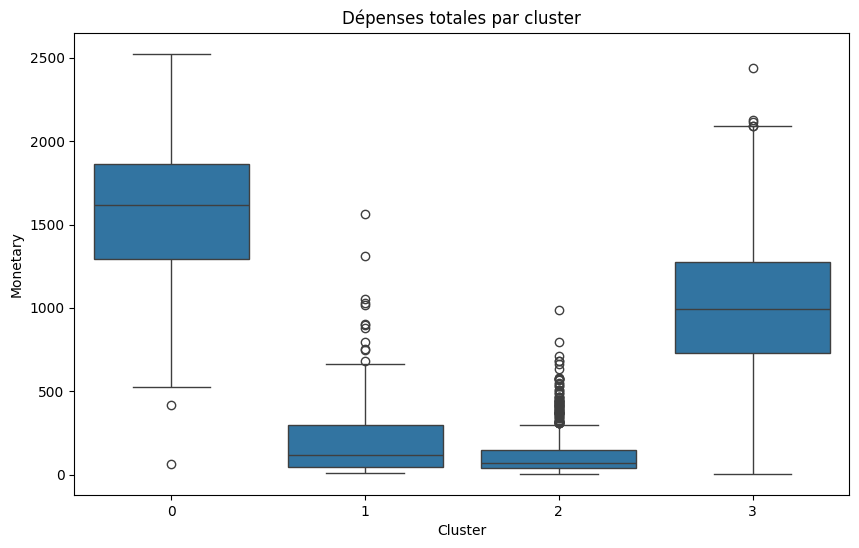

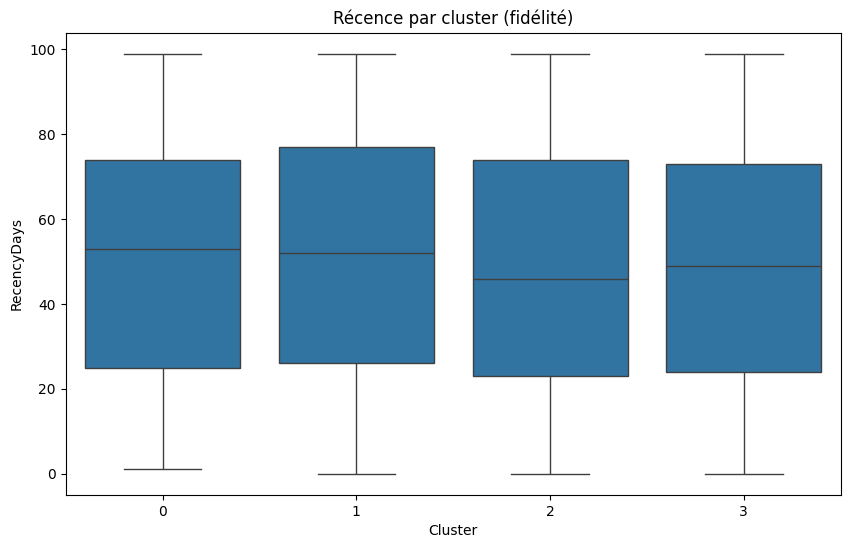

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Cluster", y="Monetary")
plt.title("Dépenses totales par cluster")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Cluster", y="RecencyDays")
plt.title("Récence par cluster (fidélité)")
plt.show()

In [ ]:
df.to_csv("Camp_Market_segmented.csv", index=False)

cluster_profile.to_csv("Customer_Cluster_Profile.csv")